# Homework 3 - Exploratory Data Analysis and Data Visualization

1. Filter the data to include only weekdays (Monday to Friday) and plot a line graph showing the pedestrian counts for each day of the week.

In [9]:
import pandas as pd 
import matplotlib.pyplot as plt

url = "https://data.cityofnewyork.us/api/views/6fi9-q3ta/rows.csv"
df = pd.read_csv(url, sep = ',')

df["hour_beginning"] = pd.to_datetime(df["hour_beginning"])
df['weekday'] = df['hour_beginning'].dt.day_name()

weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
weekday_df = df[df['weekday'].isin(weekdays)]

weekday_counts = weekday_df.groupby('weekday')['Pedestrians'].sum()

/tmp/ipykernel_133/3530285630.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["hour_beginning"] = pd.to_datetime(df["hour_beginning"])


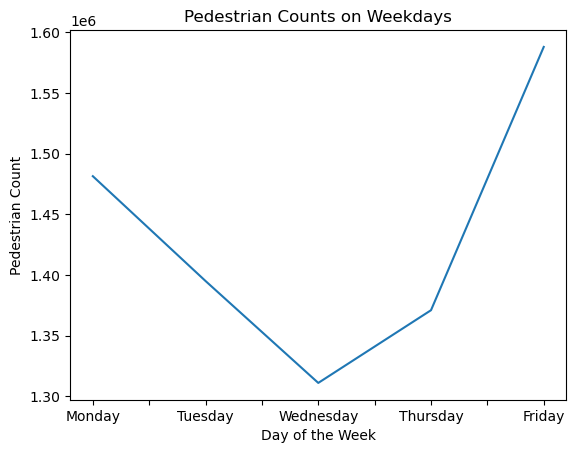

In [10]:
plt.figure()
weekday_counts.loc[weekdays].plot()

plt.title("Pedestrian Counts on Weekdays")
plt.xlabel("Day of the Week")
plt.ylabel("Pedestrian Count")
plt.show()

2. Track pedestrian counts on the Brooklyn Bridge for the year 2019 and analyze how different weather conditions influence pedestrian activity in that year. Sort the pedestrian count data by weather summary to identify any correlations( with a correlation matrix) between weather patterns and pedestrian counts for the selected year.

               Pedestrians  temperature  precipitation
Pedestrians       1.000000     0.358757      -0.105432
temperature       0.358757     1.000000       0.001911
precipitation    -0.105432     0.001911       1.000000


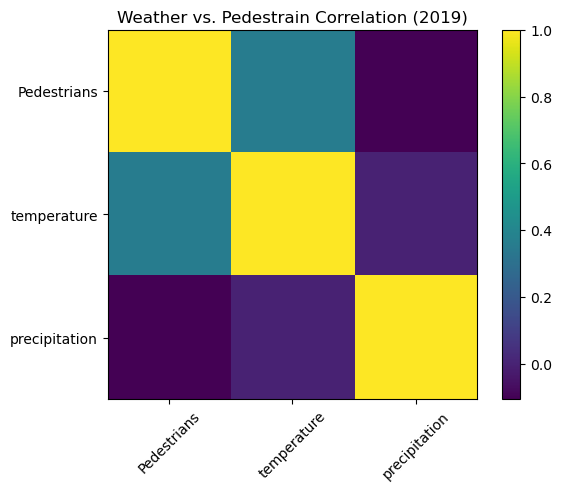

In [15]:
df_2019 = df[df["hour_beginning"].dt.year == 2019] 

df_2019_sorted = df_2019.sort_values(by = "weather_summary")

correlation_data = df_2019_sorted[["Pedestrians", "temperature", "precipitation"]]

correlation_matrix = correlation_data.corr() 
print(correlation_matrix) 

plt.figure()
plt.imshow(correlation_matrix)
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation = 45) 
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title("Weather vs. Pedestrain Correlation (2019)") 

plt.show()

3. 